# Pandas

The Pandas library is built on NumPy and provides easy-to-use data structures and data analysis tools for the Python programming language.

**Use the following import convention:**

In [1]:
import pandas as pd
import numpy as np

## Pandas Data Structures

### Series

A one dimensional labeled array capable of holding any data type 

In [4]:
# A Pandas Series is like a labeled 1D NumPy array
s = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print("Series:\n", s)

Series:
 a    10
b    20
c    30
d    40
dtype: int64


### Dataframes

A two dimensional labeled data structure with columns of potentially different types

In [96]:
# A DataFrame is like a table (rows + columns)
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Salary': [60000, 55000, 40000]
}
df = pd.DataFrame(data)
print("\nDataFrame:\n", df)


DataFrame:
       Name  Age  Salary
0    Alice   25   60000
1      Bob   30   55000
2  Charlie   35   40000


## I/O (Reading & Writing Data)

In [ ]:
# CSV
df = pd.read_csv('file.csv', header=None, nrows=5)
df.to_csv('myDataFrame.csv', index=False)

In [ ]:
# Excel
xlsx = pd.ExcelFile('file.xls')
df1 = pd.read_excel(xlsx, 'Sheet1')
df1.to_excel('output.xlsx', sheet_name='Sheet1', index=False)

In [ ]:
# SQL
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
df_sql = pd.read_sql('SELECT * FROM my_table', engine)
df_sql.to_sql('myDf', engine, index=False)

## Selection/Indexing

**Basic Selection**

- Get element in Series:

In [16]:
value = s['b']
print("Selected Value:", value)

Selected Value: 20


- Subset of DataFrame:

In [20]:
sub = df[1:]  # everything except first row
print("Selected Subset:\n", sub)

Selected Subset:
       Name  Age  Salary
1      Bob   30   55000
2  Charlie   35   60000


**Selection By Position**

In [21]:
df.iloc[0, 0]   # first row, first column  

'Alice'

In [22]:
df.iat[0, 0]    # slightly faster scalar access  

'Alice'

**Selection By Lable**

In [23]:
df.loc[0, 'Name']

'Alice'

In [24]:
df.at[0, 'Name']

'Alice'

**Boolean Indexing**

Explanation of filter
- `s<20` ==> This creates a Boolean mask — a Series of `True`/`False` values indicating which elements of `s` are less than 20.
- `~(s<20)` ==> The tilde `~` is the **bitwise NOT** operator in Pandas (and NumPy).
- `s[~(s<20)]` ==> Finally, this filters the Series `s` to include only the elements where the condition `~(s<20)` is True, i.e., where `s>=20`.

In [39]:
# Series condition
filtered_s = s[~(s < 20)] #
print("Filtered series: \n", filtered_s)

Filtered series: 
 b    20
c    30
d    40
dtype: int64


In [40]:
# Combined conditions
filtered_s2 = s[(s < 20) | (s > 30)]
print("Filtered series: \n", filtered_s2)

Filtered series: 
 a    10
d    40
dtype: int64


In [41]:
# DataFrame filtering
df2 = df[df['Salary'] > 50_000]
print("Filtered dataframe: \n", df2)

Filtered dataframe: 
       Name  Age  Salary
1      Bob   30   55000
2  Charlie   35   60000


**Setting Values**

In [43]:
s['a'] = 50
print("Updated series: \n", s)

Updated series: 
 a    50
b    20
c    30
d    40
dtype: int64


**Dropping**

In [9]:
s.drop(['a','c']) #Drop values from rows (axis=0) and returns new series

b    20
d    40
dtype: int64

In [12]:
df.drop('Name', axis=1) #Drop values from columns(axis=0)

,Age,Salary
0,25,50000
1,30,55000
2,35,60000


## Sorting & Ranking

In [44]:
df_sorted = df.sort_index()  # sort by row labels
print("Sorted dataframe:\n",df_sorted);

Sorted dataframe:
       Name  Age  Salary
0    Alice   25   50000
1      Bob   30   55000
2  Charlie   35   60000


In [48]:
df_sorted2 = df.sort_values(by='Salary')  # sort by column values
print("Sorted dataframe:\n",df_sorted2);

Sorted dataframe:
       Name  Age  Salary
2  Charlie   35   40000
1      Bob   30   55000
0    Alice   25   60000


In [49]:
df_rank = df.rank()
print("Ranked dataframe:\n",df_rank);

Ranked dataframe:
    Name  Age  Salary
0   1.0  1.0     3.0
1   2.0  2.0     2.0
2   3.0  3.0     1.0


## Retrieving Info / Summary Stats

In [50]:
df.shape             # (rows, columns)

(3, 3)

In [51]:
df.index             # index labels

RangeIndex(start=0, stop=3, step=1)

In [ ]:
df.columns           # column labels



df.min(), df.max()
df.idxmin(), df.idxmax()
df.mean(), df.median()

In [56]:
df.info()            # summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Salary  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


In [57]:
df.count()           # non-NA count

Name      3
Age       3
Salary    3
dtype: int64

In [58]:
df.describe()        # summary statistics

,Age,Salary
count,3.0,3.000000
mean,30.0,51666.666667
std,5.0,10408.329997
min,25.0,40000.000000
25%,27.5,47500.000000
50%,30.0,55000.000000
75%,32.5,57500.000000
max,35.0,60000.000000


In [59]:
df.sum()

Name      AliceBobCharlie
Age                    90
Salary             155000
dtype: object

In [60]:
df.cumsum()

,Name,Age,Salary
0,Alice,25,60000
1,AliceBob,55,115000
2,AliceBobCharlie,90,155000


In [61]:
df.min()

Name      Alice
Age          25
Salary    40000
dtype: object

In [62]:
df.max()

Name      Charlie
Age            35
Salary      60000
dtype: object

In [63]:
df.idxmin()

Name      0
Age       0
Salary    2
dtype: int64

In [64]:
df.idxmax()

Name      2
Age       2
Salary    0
dtype: int64

In [69]:
df_mean = df.drop('Name', axis=1)
df_mean.mean()

Age          30.000000
Salary    51666.666667
dtype: float64

In [67]:
df_median = df.drop('Name', axis=1)
df_median.median()

Age          30.0
Salary    55000.0
dtype: float64

## Applying Functions

In [75]:
# Define a simple function
f = lambda x: x * 2

# Apply across DataFrame (row-wise or column-wise)
df.apply(f)

,Name,Age,Salary
0,AliceAlice,50,120000
1,BobBob,60,110000
2,CharlieCharlie,70,80000


In [77]:
# Apply function only on selected column
df['Salary'] = df['Salary'].apply(f)
print("Updated dataframe: \n", df)

Updated dataframe: 
       Name  Age  Salary
0    Alice   25  120000
1      Bob   30  110000
2  Charlie   35   80000


In [78]:
df.loc[1] = df.loc[1].apply(f)
print("Updated dataframe: \n", df)

Updated dataframe: 
       Name  Age  Salary
0    Alice   25  120000
1   BobBob   60  220000
2  Charlie   35   80000


In [74]:
# Element-wise (if numeric / element-level)
df_transform = df.drop('Name', axis=1)
df_transform.transform(lambda x: x + 1)  # or use applymap

,Name,Age,Salary
0,AliceAlice,50,120000
1,BobBob,60,110000
2,CharlieCharlie,70,80000


## Alignment & Arithmetic with Fill Values

In [80]:
s1 = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([7, -2, 3], index=['a', 'c', 'd'])

# Aligns automatically but missing values changes to NaN(Not a  Number)
s_sum = s1 + s2
print("Result:\n",s_sum)

# Using fill_value
s_add = s1.add(s2, fill_value=0)
print("Result:\n",s_add)
s_sub = s1.sub(s2, fill_value=2)
print("Result:\n",s_sub)
s_div = s1.div(s2, fill_value=4)
print("Result:\n",s_div)
s_mul = s1.mul(s2, fill_value=3)
print("Result:\n",s_mul)


Result:
 a    10.0
b     NaN
c     5.0
d     7.0
dtype: float64
Result:
 a    10.0
b    -5.0
c     5.0
d     7.0
dtype: float64
Result:
 a   -4.0
b   -7.0
c    9.0
d    1.0
dtype: float64
Result:
 a    0.428571
b   -1.250000
c   -3.500000
d    1.333333
dtype: float64
Result:
 a    21.0
b   -15.0
c   -14.0
d    12.0
dtype: float64


## Reshaping Data

- **Pivot:** reshape data (spread rows into columns)

In [84]:
data_adv = {
    'Date': ['2025-03-01', '2025-03-02', '2025-03-01', '2025-03-03', '2025-03-02', '2025-03-03'],
    'Type': ['a', 'b', 'c', 'a', 'a', 'c'],
    'Value': [11.432, 13.031, 20.784, 99.906, 1.303, 20.784]
}
df_adv = pd.DataFrame(data_adv)
df_p = df_adv.pivot(index='Date', columns='Type', values='Value')
print("Pivot dataframe:\n", df_p)

Pivot dataframe:
 Type             a       b       c
Date                              
2025-03-01  11.432     NaN  20.784
2025-03-02   1.303  13.031     NaN
2025-03-03  99.906     NaN  20.784


- **Pivot Table**: like Excel pivot with aggregation

In [87]:
df_pt = pd.pivot_table(df_adv, index='Date', columns='Type', values='Value', aggfunc='mean')
print("Pivot table dataframe:\n", df_pt)

Pivot table dataframe:
 Type             a       b       c
Date                              
2025-03-01  11.432     NaN  20.784
2025-03-02   1.303  13.031     NaN
2025-03-03  99.906     NaN  20.784


- **Stack / Unstack:** compress / expand levels of index

In [90]:
stacked = df_adv.stack()
print("Stacked dataframe:\n", stacked)

Stacked dataframe:
 0  Date     2025-03-01
   Type              a
   Value        11.432
1  Date     2025-03-02
   Type              b
   Value        13.031
2  Date     2025-03-01
   Type              c
   Value        20.784
3  Date     2025-03-03
   Type              a
   Value        99.906
4  Date     2025-03-02
   Type              a
   Value         1.303
5  Date     2025-03-03
   Type              c
   Value        20.784
dtype: object


In [91]:
unstacked = stacked.unstack()
print("Unstacked dataframe:\n", unstacked)

Unstacked dataframe:
          Date Type   Value
0  2025-03-01    a  11.432
1  2025-03-02    b  13.031
2  2025-03-01    c  20.784
3  2025-03-03    a  99.906
4  2025-03-02    a   1.303
5  2025-03-03    c  20.784


- **Melt:** “unpivot” from wide to long format

In [93]:
melted = pd.melt(df_adv, id_vars=['Date'], value_vars=['Type', 'Value'], var_name='Var', value_name='Observations')
print("Melted dataframe:\n", melted)

Melted dataframe:
           Date    Var Observations
0   2025-03-01   Type            a
1   2025-03-02   Type            b
2   2025-03-01   Type            c
3   2025-03-03   Type            a
4   2025-03-02   Type            a
5   2025-03-03   Type            c
6   2025-03-01  Value       11.432
7   2025-03-02  Value       13.031
8   2025-03-01  Value       20.784
9   2025-03-03  Value       99.906
10  2025-03-02  Value        1.303
11  2025-03-03  Value       20.784


## Iteration

In [104]:
# Iterate by column
for col, series in df.items():
    print(col, series)

Name 0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object
Age 0    25
1    30
2    35
Name: Age, dtype: int64
Salary 0    60000
1    55000
2    40000
Name: Salary, dtype: int64


In [100]:
# Iterate by row
for idx, row in df.iterrows():
    print(idx, row['Name'], row['Salary'])

0 Alice 60000
1 Bob 55000
2 Charlie 40000


## Handling Missing Data (Advanced)

In [ ]:
df3 = df.dropna()                     # drop rows with NA  
df3 = df3.fillna(df3.mean())          # fill using mean  
df2 = df2.replace("a", "f")            # replace specific values  

## Advanced Indexing & Subsetting

In [ ]:
# Select columns where any value > 1
df3 = df3.loc[:, (df3 > 1).any()]

# Select columns with any nulls
df3 = df3.loc[:, df3.isnull().any()]

# Using isin
df_filtered = df[df['Country'].isin(['Belgium', 'India'])]

# Using query (string expression)
df_query = df.query('Population > 1000000000')


## Index Management

In [ ]:
# Set / reset index
df2 = df.set_index('Country')
df2_reset = df2.reset_index()

# Rename index / columns
df2 = df2.rename(index=str, columns={'Country':'cntry', 'Population':'pop'})


## Reindexing

In [ ]:
s2 = s.reindex(['a','c','d','e','b'])
# Forward fill
s_ffill = s.reindex(range(4), method='ffill')
# Backward fill
s_bfill = s.reindex(range(5), method='bfill')

## Multi-Index / Hierarchical Indexing

In [ ]:
arrays = [np.array([1, 2, 3]), np.array([5, 4, 3])]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df_multi = pd.DataFrame(np.random.rand(3, 2), index=index)

# You can also set multi-index from columns
df2 = df.set_index(['Date', 'Type'])

## Duplicate Data

In [ ]:
s3 = s.unique()                      # unique values
dup_mask = df2.duplicated('Type')     # boolean mask for duplicates
df_no_dup = df2.drop_duplicates('Type', keep='last')
idx_dup = df.index.duplicated()       # index duplicates

## Grouping / Aggregation / Transformation

In [ ]:
# Aggregation by multiple levels
agg_df = df2.groupby(['Date', 'Type']).mean()

# Transformation
custom_sum = lambda x: (x + x % 2)
transformed = df2.groupby(level=0).transform(custom_sum)

# Using agg with custom functions
agg_custom = df2.groupby(level=0).agg({
    'a': lambda x: sum(x)/len(x),
    'b': np.sum
})

## Combining DataFrames

- **Merge / Join:** different merge strategies

In [ ]:
df_merged_left = pd.merge(data1, data2, how='left', on='X1')
df_merged_inner = pd.merge(data1, data2, how='inner', on='X1')
df_merged_outer = pd.merge(data1, data2, how='outer', on='X1')

- **Join:** using DataFrame .join()

In [ ]:
joined = data1.join(data2, how='right')

- **Concatenate:** stacking DataFrames / Series

In [ ]:
joined = data1.join(data2, how='right')

## Working with Dates / Time Series

In [107]:
# Convert to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Create a date range
df2['Date'] = pd.date_range('2000-01-01', periods=len(df2), freq='M')

KeyError: 'Date'

## Visualization (with Pandas)

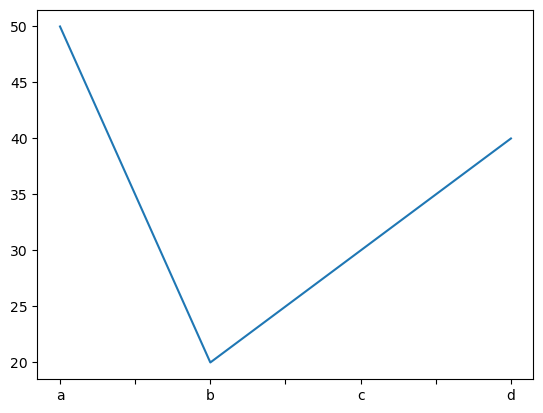

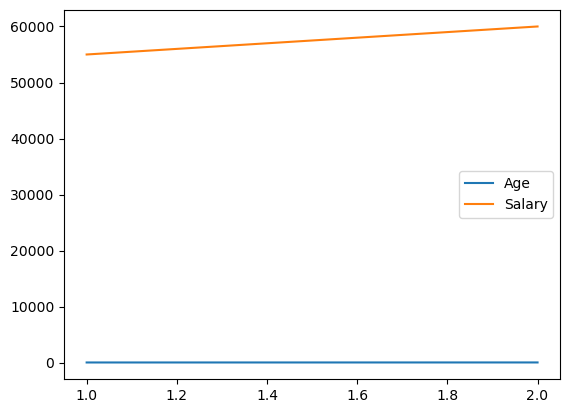

In [106]:
import matplotlib.pyplot as plt

s.plot()
plt.show()

df2.plot()     # DataFrame plot
plt.show()


## Asking For Help

In [15]:
help(pd.Series.loc)

Help on property:

loc
    Access a group of rows and columns by label(s) or a boolean array.

    ``.loc[]`` is primarily label based, but may also be used with a
    boolean array.

    Allowed inputs are:

    - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
      interpreted as a *label* of the index, and **never** as an
      integer position along the index).
    - A list or array of labels, e.g. ``['a', 'b', 'c']``.
    - A slice object with labels, e.g. ``'a':'f'``.

      .. warning:: Note that contrary to usual python slices, **both** the
          start and the stop are included

    - A boolean array of the same length as the axis being sliced,
      e.g. ``[True, False, True]``.
    - An alignable boolean Series. The index of the key will be aligned before
      masking.
    - An alignable Index. The Index of the returned selection will be the input.
    - A ``callable`` function with one argument (the calling Series or
      DataFrame) and that returns valid o